<a href="https://colab.research.google.com/github/Ansebi/OnePxlArt/blob/main/one_pixel_art.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#One Pixel Art

[Google Sheets](https://docs.google.com/spreadsheets/d/1FQHuUItP6f4yVDcGg4cMlnlFRKhiC2OHihYLql1gP10/edit?usp=sharing)

##Definitions

In [ ]:
from PIL import Image as img
import numpy as np
from matplotlib import pyplot as plt
import urllib.request
import pandas as pd
import re
import os

H = 1000
W = 1000
URL = 'https://docs.google.com/spreadsheets/d/1FQHuUItP6f4yVDcGg4cMlnlFRKhiC2OHihYLql1gP10/export?format=csv&?usp=sharing'

In [ ]:
def get_average(filepath):
  original = img.open(filepath)
  original = np.array(original)
  height, width, _ = original.shape
  average_color = original.reshape([height*width,3]).mean(axis=0).astype(int)
  average_square = np.tile(average_color, (H, W, 1))
  return original, average_square, average_color


def before_after(original, average_square, name, pad_inches=1):
  plt.style.use('dark_background')
  fig, axes = plt.subplots(1,2)
  axes[0].imshow(average_square)
  axes[0].axis('off')
  axes[1].imshow(original)
  axes[1].axis('off')
  plt.savefig(f'1pxlrt/{name}/before_after_{name}.png',
              bbox_inches='tight',
              pad_inches=pad_inches)
  plt.show()
  

def one_color(average_square, name):
  plt.imsave(fname=f'1pxlrt/{name}/one_color_{name}.png',
             arr=average_square/255)


def one_pixel(average_color, name, pad_inches=0):
  plt.imsave(fname=f'1pxlrt/{name}/one_pixel_{name}.png',
             arr=average_color[None, None, ...]/255)

  
def convert_name(str_):
  return re.sub('[^A-Za-z_0-9]+','',
                re.sub('[\n ]+', '_',
                       re.sub('[éè]', 'e',
                              re.sub('[à]', 'a', str_))))
  
  
def process(row):
  artist = row.Artist
  painting = row.Painting
  url = row.Image
  if all([artist, painting, url]):
    name = f'{artist}: {painting}'
    print(name)
    name = convert_name(name)
    os.mkdir(f'1pxlrt/{name}')
    filepath = f'1pxlrt/{name}/{name}.jpg'
    urllib.request.urlretrieve(url, filepath)
    original, average_square, average_color = get_average(filepath)
    before_after(original, average_square, name)
    one_color(average_square, name)
    one_pixel(average_color, name)


def run(start_row=None, finish_row=None):
  df_art = pd.read_csv(URL)
  if not os.path.exists('1pxlrt'):
    os.mkdir('1pxlrt')
  if (not start_row) and (not finish_row):
    df_art.apply(lambda row: process(row), axis='columns')
  else:
    if not finish_row:
      finish_row = start_row
    if not start_row:
      start_row = finish_row  
    for row in range(len(df_art))[start_row-1:finish_row]:
      print(row + 1, end='. ')
      process(df_art.iloc[row])

##Run

8. Rembrandt: Pendant portraits of
Maerten Soolmans
and Oopjen Coppit


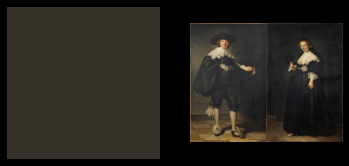

  adding: 1pxlrt/ (stored 0%)
  adding: 1pxlrt/Rembrandt_Pendant_portraits_of_Maerten_Soolmans_and_Oopjen_Coppit/ (stored 0%)
  adding: 1pxlrt/Rembrandt_Pendant_portraits_of_Maerten_Soolmans_and_Oopjen_Coppit/before_after_Rembrandt_Pendant_portraits_of_Maerten_Soolmans_and_Oopjen_Coppit.png (deflated 5%)
  adding: 1pxlrt/Rembrandt_Pendant_portraits_of_Maerten_Soolmans_and_Oopjen_Coppit/one_pixel_Rembrandt_Pendant_portraits_of_Maerten_Soolmans_and_Oopjen_Coppit.png (deflated 12%)
  adding: 1pxlrt/Rembrandt_Pendant_portraits_of_Maerten_Soolmans_and_Oopjen_Coppit/one_color_Rembrandt_Pendant_portraits_of_Maerten_Soolmans_and_Oopjen_Coppit.png (deflated 96%)
  adding: 1pxlrt/Rembrandt_Pendant_portraits_of_Maerten_Soolmans_and_Oopjen_Coppit/Rembrandt_Pendant_portraits_of_Maerten_Soolmans_and_Oopjen_Coppit.jpg (deflated 0%)


In [ ]:
START_ROW = None  # as in Google Sheets (Item's Number), starts from 1
FINISH_ROW = None  # as in Google Sheets (Item's Number), starts from 1

run(start_row=START_ROW, finish_row=FINISH_ROW)
!zip -r ./one_pixel_art.zip ./1pxlrt/